# Introduction


In this tutorial, we would focus about Eclat Algorithm for frequency set mining.

<h3>Association Rule Mining</h3>

Association rule mining is used to determine meaningful relationships or frequent co-occuring associations between variables in a database. The most common application of Association rule mining is Market Basket Analysis which is intended to find the most frequently purchased items.This data would allow the business to understand buying patterns which in turn would help them in cross-selling, promotions, loyalty etc.

This algorithm is also extensively used in other real world applications.<br>
For example: In Customer Relationship Management, customer segmentations and niche marketing can be carried out with the help of association rules derived from the dataset.<br>
We can group customers with similar preferences(say, similar preferences in mobile apps) and direct different promotions according to the segment(say, for gamers we could send apps more pertaining to the game domain). This increases customer retention and loyalty which inturn increases revenue.





### Installation:

Installation of Graphviz:
Use the command:

`pip install graphviz` 

After installing Graphviz, make sure that its <font color='red'>bin/ </font> subdirectory containing the layout commands for rendering graph descriptions (dot, circo, neato, etc.) is on your systems’ path. For further queries, please use the link mentioned as the second reference at the end of this tutorial.

Note: If the above does not work try <font color='red'>conda install graphviz  </font>

### Datset:
Use test.csv that is a part of the handin.tar file

In [243]:
import pandas as pd
import csv
from graphviz import Digraph
import operator
from collections import OrderedDict
import itertools


The general transaction data has a horizontal layout with transanctions followed by the item list pertaining to this transaction. Eclat algorithm works on vertical data layout/t-id sets where each item is associated with the transactions it has occured in. For this tutorial,we take a simple dataset with 7 transactions. A simple dataset is chosen here in order to understand the step by step working of Eclat algorithm and also to represent a DFS tree that is easier to interpret.



| Transaction | Item List |
| -- | --- |
| 1 | milk |
| 2 | milk,bread,jam,butter |
| 3 | bread,jam |
| 4 | bread,butter,jam |
| 5 | milk,butter |
| 6 | milk,bread,marmalade,jam |
| 7 | bread,jam,spoon |

In [244]:
print("Given csv file transaction data")
print("[Transaction,Item_List]")
data_size=0
with open('test.csv',encoding='utf-8') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            print(row)
            data_size = data_size+1

Given csv file transaction data
[Transaction,Item_List]
['1', 'milk']
['2', 'milk', 'bread', 'jam', 'butter']
['3', 'bread', 'jam']
['4', 'bread', 'butter', 'jam']
['5', 'milk', 'butter']
['6', 'milk', 'bread', 'marmalade', 'jam']
['7', 'bread', 'jam', 'spoon']


In [245]:
print("Creation of a vertical data set from horizontal data set:")
item_list={}
with open('test.csv',encoding='utf-8') as csvfile:
     spamreader = csv.reader(csvfile)
     for row in spamreader:
       # print(row)
        i=1
        for i in range(1,len(row)):
            if row[i] in item_list.keys():
                item_list[row[i]].append(row[0])
            else:
                
                item_list[row[i]] = [row[0]]
print("The underlying item-transaction file is:")
for it,trans in item_list.items():
            print(it,trans)

Creation of a vertical data set from horizontal data set:
The underlying item-transaction file is:
milk ['1', '2', '5', '6']
bread ['2', '3', '4', '6', '7']
jam ['2', '3', '4', '6', '7']
butter ['2', '4', '5']
marmalade ['6']
spoon ['7']


### ARM Metrics

#### Support and Confidence: 
Support of an association rule is defined as the percentage/fraction of records that contain the itemset X ∪ Y to the total number of records in the database. It determines how frequent this itemset is

$$s(X→Y) = \sigma(X \cup Y)/N$$

Confidence of an association rule is defined as the percentage/fraction of the number of transactions that contain X∪Y to the total number of records that contain X. This suggests how likely it is that Y is purchased when X is purchased.

$$c(X→Y) = \sigma(X \cup Y)/\sigma(X)$$         

### ARM Procedure:

Association Rule Mining has two major steps:

1) <b> Generation of frequent item sets:</b> Itemsets(collection of one or more items) whose support is greater than a specified threshold called the minimum-support.

2) <b> Generation of association rules:</b> These rules will specify the purchase patterns and is formed with the frequent itemsets that are generated in step1.Those rules that satisfy a minimum-confidence threshold are considered the rules for this market basket data.

The threshold values will depend on the dataset and also on the underlying application.

In [304]:
min_sup=float(input("Enter minimum support for the dataset:"))
#feed value used = 0.285 [In order to observe 3-frequent itemsets also]

Enter minimum support for the dataset:0.285


In [305]:
print("Minimum support:",(min_sup))

Minimum support: 0.285


## ECLAT Algorithm:

The Eclat algorithm is a Depth First Search algorithm that uses the vertical dataset layout.

This algorithm generates frequent itemsets using these two steps:

1) <b>Candidate Generation</b>

2) <b>Pruning</b>

Before we understand the implementation of Eclat, we need to understand two major properties that ECLAT algorithm uses

In [306]:
#class to hold equivalence class item sets and associated prefix at every depth
class E:
    def __init__(self,item_set, prefix):
        self.prefix = prefix
        self.item_set = item_set
        

### Properties of Eclat:
1)<b> Equivalence Class and Prefix:</b>
An equivalence class of k-itemsets is a set of k-itemsets in the depth first search tree with k-1 items as common prefix

$$E = ((i1,t(i1\cup P)),...,(ik,t(ik\cup P))|P) where i1,...,ik \not\in P $$ are itemsets with P as prefix<br>

For example: If itemsets are (a,b,c,d,e) an equivalence class with prefix a is denoted as (b,c,d,e|a) where the itemsets are {ab,ac,ad,ae}<br>

2)<b> Downward Closure Property:</b> If an itemset is infrequent, then its supersets are also infrequent. Thus the algorithm uses this property to reduce computation time and only check the itemsets whose subsets already satisfy the frequent candidate condition.

### Candidate Generation(1-frequent itemset):
We do pre pruning of the data by removing those items that already do not satisfy the minimum threshold. By downward closure property, the supersets will also be infrequent and hence we remove them from the data set.

In [307]:
#Pre pruning step removing infrequent 1-itemset 
new_item_list={} #dict to hold item and transactions
support_list={} #dict to hold item and support
for i, (item, transactions) in enumerate(item_list.items()):
    # check if support is greater than threshold
    if (len(transactions)/(data_size))>=min_sup:
        new_item_list[item] = transactions
        support_list[item]=(round(len(transactions)/(data_size),2))
e =E(new_item_list,set({}))



In [308]:
print("1-frequent itemset to generate other frequent candidate sets through Eclat:")
final_list =list(new_item_list.keys())
final_trans = list(new_item_list.values())
for i in range(0,len(final_list)):
    print(final_list[i],final_trans[i]," #SUP:",support_list[final_list[i]])

1-frequent itemset to generate other frequent candidate sets through Eclat:
milk ['1', '2', '5', '6']  #SUP: 0.57
bread ['2', '3', '4', '6', '7']  #SUP: 0.71
jam ['2', '3', '4', '6', '7']  #SUP: 0.71
butter ['2', '4', '5']  #SUP: 0.43


In [309]:
#dot_1 denotes tree structure for eclat algorithm search
dot_1 = Digraph("frequent itemset")
dot_1.node('root','root')
for it,tr in item_list.items():
    if (len(tr)/(data_size))>=min_sup:
        dot_1.node(it,it)
        dot_1.edge('root', it)
    else:
        dot_1.node(it,it,color='red')
        dot_1.edge('root', it)
        
    

#### Note: 
Digraph is a python interface for drawing graphs and can be installed to include simple inline jupyter graphs 

### DFS tree with 1-frequent itemsets:
Those nodes which are red in color are infrequent and removed after the prepruning step. We observe that marmalade and spoon do not satisfy the minimum support threshold and is removed from the first step of frequent itemset generation.

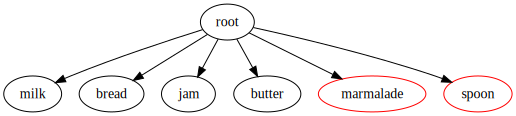

In [310]:
dot_1

#### Note:
The code below is used to ensure that sets maintain the order after any operation performed on them.

In [311]:
#SO:https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set
#SO:http://code.activestate.com/recipes/576694/
import collections

class OrderedSet(collections.MutableSet):

    def __init__(self, iterable=None):
        self.end = end = [] 
        end += [None, end, end]         # sentinel node for doubly linked list
        self.map = {}                   # key --> [key, prev, next]
        if iterable is not None:
            self |= iterable

    def __len__(self):
        return len(self.map)

    def __contains__(self, key):
        return key in self.map

    def add(self, key):
        if key not in self.map:
            end = self.end
            curr = end[1]
            curr[2] = end[1] = self.map[key] = [key, curr, end]

    def discard(self, key):
        if key in self.map:        
            key, prev, next = self.map.pop(key)
            prev[2] = next
            next[1] = prev

    def __iter__(self):
        end = self.end
        curr = end[2]
        while curr is not end:
            yield curr[0]
            curr = curr[2]

    def __reversed__(self):
        end = self.end
        curr = end[1]
        while curr is not end:
            yield curr[0]
            curr = curr[1]

    def pop(self, last=True):
        if not self:
            raise KeyError('set is empty')
        key = self.end[1][0] if last else self.end[2][0]
        self.discard(key)
        return key

    def __repr__(self):
        if not self:
            return '%s()' % (self.__class__.__name__,)
        return '%s(%r)' % (self.__class__.__name__, list(self))

    def __eq__(self, other):
        if isinstance(other, OrderedSet):
            return len(self) == len(other) and list(self) == list(other)
        return set(self) == set(other)
#SO:https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set
#SO:http://code.activestate.com/recipes/576694/

### ECLAT IMPLEMENTATION:
1) Candidate Generation is done by forming equivalence class and prefix<br>
2) Pruning is done by comparison of the new itemset with minsup threshold

Algorithm:
Start with Eclat equivalence class E with prefix={} and all 1-frequent itemsets and transactions

for all i in E:<br>
&nbsp;    Fix prefix =Prefix $\cup $ i <br>
&nbsp;    initialise E_new as new equivalence class with prefix P <br>
&nbsp;    for all j in E where j>i:<br>
&nbsp;&nbsp;&nbsp;&nbsp;     find the intersection of transaction of item i and j $ti\cap tj$<br>
&nbsp;&nbsp; &nbsp;     if the new itemset has support (length of transaction/total no of transactions) >= min sup:<br>
&nbsp;&nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;      E_new is now equivalence class with new itemset<br>
&nbsp;&nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;       Add the itemset $\cup$ Prefix as frequent itemset<br>
&nbsp;    if E_new is not null:<br>
&nbsp;&nbsp;&nbsp; &nbsp;       recursively call function with E_new (Generate higher candidate itemsets)


### Candidate Generation:


In [320]:
def eclat_candidate(e):
    prefix=e.prefix

    for i, (item, transactions) in enumerate(e.item_set.items()):
        # To show candidate generation for first item alone
        if (i==1): break
        # prefix = prefix U current_item
        item_set = OrderedSet()
        item_set.add(item)
        prefix = e.prefix|(item_set) 
        list_prefix =list(prefix)
        s1=','.join(list_prefix)
        list_prefix=s1.split(",")
        for l_pref in list_prefix:
            l_pref=l_pref.strip()
        # To ensure prefix is consistent
        prefix =OrderedSet(list_prefix)
        temp_set_i = OrderedSet() # hold transaction list of item i
        for t in transactions:
                    temp_set_i.add(t)
        e_new = E({},prefix) # initialise new equivalence class with  current prefix 
        print("Current Item/Prefix:",item)
        print("Transaction List:",temp_set_i)
       
        for j, (item, transactions) in enumerate(e.item_set.items()):
            if j>i:
                
                temp_set = OrderedSet()#transaction list to compare with
                for t in transactions:
                    temp_set.add(t)
                print(" ")
                print("Item under consideration",item)
                print("Transaction list:", temp_set)
                temp_set = (temp_set_i & temp_set)
                print("Intersected Transaction list:",temp_set)
                
eclat_candidate(e)

Current Item/Prefix: milk
Transaction List: OrderedSet(['1', '2', '5', '6'])
 
Item under consideration bread
Transaction list: OrderedSet(['2', '3', '4', '6', '7'])
Intersected Transaction list: OrderedSet(['2', '6'])
 
Item under consideration jam
Transaction list: OrderedSet(['2', '3', '4', '6', '7'])
Intersected Transaction list: OrderedSet(['2', '6'])
 
Item under consideration butter
Transaction list: OrderedSet(['2', '4', '5'])
Intersected Transaction list: OrderedSet(['2', '5'])


We can observe below on how the program runs:<br>
&nbsp;Candidate Generation:<br>
&nbsp;&nbsp;&nbsp;1)Initially we pass the equivalence class {milk,bread,jam,butter|{}} with all 1-frequent itemsets with prefix {}<br>
&nbsp;&nbsp;&nbsp;2)In the first pass it sets the prefix as milk and forms equivalence class {bread,milk,butter|milk} <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For every other item than milk,<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; It performs the intersection of milk with current items bread,jam,butter as seen above.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Pruning:<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If it satisfies the threshold then it would add to final list of frequent itemsets.
     
  

### Equivalence Class and Pruning

In [322]:
tree_red ={}
def eclat(e):
    prefix=e.prefix

    for i, (item, transactions) in enumerate(e.item_set.items()):
        # prefix = prefix U current_item
        
        item_set = OrderedSet()
        item_set.add(item)
        prefix = e.prefix|(item_set)
        # To ensure prefix is consistent
        list_prefix =list(prefix)
        s1=','.join(list_prefix)
        list_prefix=s1.split(",")
        for l_pref in list_prefix:
            l_pref=l_pref.strip()
        prefix =OrderedSet(list_prefix)
        # hold transaction list of itemset i
        temp_set_i = OrderedSet()
        for t in transactions:
                    temp_set_i.add(t)
        # initialise new equivalence class with  current prefix 
        e_new = E({},prefix)
        # to hold nodes of DFS tree
        tree_list=[]
        for j, (item, transactions) in enumerate(e.item_set.items()):
            if j>i:
                #transaction list of itemset under consideration
                temp_set = OrderedSet()
                for t in transactions:
                    temp_set.add(t)
                
                temp_set = (temp_set_i & temp_set)
                #Pruning- Check with min_sup value
                if (len(temp_set)/data_size) >=min_sup:
                    final_set = OrderedSet()
                    final_set.add(item)
                    # if condition satisfies add next level itemset to final frequent itemset
                    l=list(prefix|(final_set))
                    s=','.join(l)
                    # Add itemset under consideration to new equivalence class
                    # Downward closure property 
                    #If an itemset is infrequent,it is not added to equivalence class
                    #Hence, it eliminates pruning process for those supersets
                    e_new.item_set[item] = list(temp_set)
                    set_new =OrderedSet()
                    tree_list.append(s)
                    # Final frequent itemset and transaction list
                    final_list.append(s)
                    final_trans.append(list(temp_set))
                else:
                    # If itemset does not satisfy the condition, add to tree as infrequent node
                    tree_set = OrderedSet()
                    tree_set.add(item)
                    tree_red[','.join(list(prefix))]= ','.join(list(prefix|(tree_set)))
                    
        str1 = ','.join(list(prefix))
        if(len(prefix)==1):
            print(" ")
            print(" ")
        print(len(prefix),"-itemset generation")
        print("Equivalence Class prefix:",str1)
        print("Equivalence Class:", e_new.item_set)
        print(" ")
        # Tree construction
        for k in range(0,len(tree_list)):
             #print("tree:",tree_list[k])
             dot_1.node(tree_list[k],tree_list[k])
             dot_1.edge(str1,tree_list[k])
        # recursive call of the algorithm to generate next level itemsets
        if len(e_new.item_set)!=0:
             eclat(e_new)
        else:
             continue

    


In [323]:
eclat(e)
        
for root,child in tree_red.items():
    #print("Tree red:",root,child)
    dot_1.node(child,child,color='red')
    dot_1.edge(root,child)

 
 
1 -itemset generation
Equivalence Class prefix: milk
Equivalence Class: {'bread': ['2', '6'], 'jam': ['2', '6'], 'butter': ['2', '5']}
 
2 -itemset generation
Equivalence Class prefix: milk,bread
Equivalence Class: {'jam': ['2', '6']}
 
3 -itemset generation
Equivalence Class prefix: milk,bread,jam
Equivalence Class: {}
 
2 -itemset generation
Equivalence Class prefix: milk,jam
Equivalence Class: {}
 
2 -itemset generation
Equivalence Class prefix: milk,butter
Equivalence Class: {}
 
 
 
1 -itemset generation
Equivalence Class prefix: bread
Equivalence Class: {'jam': ['2', '3', '4', '6', '7'], 'butter': ['2', '4']}
 
2 -itemset generation
Equivalence Class prefix: bread,jam
Equivalence Class: {'butter': ['2', '4']}
 
3 -itemset generation
Equivalence Class prefix: bread,jam,butter
Equivalence Class: {}
 
2 -itemset generation
Equivalence Class prefix: bread,butter
Equivalence Class: {}
 
 
 
1 -itemset generation
Equivalence Class prefix: jam
Equivalence Class: {'butter': ['2', '4'

### Final View of DFS tree:
Red nodes are infrequent. This tree represents the depth first search algorithm of eclat at every level/depth. The nodes that do not satisfy the minimum threshold are denoted in red and other nodes are the ones that are a part of the final frequent itemset.

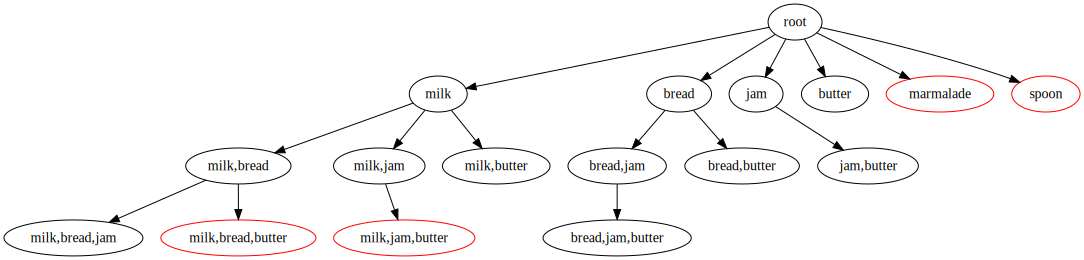

In [315]:

dot_1

### Final list of frequent itemsets

In [316]:
print("Frequent itemsets:")
final_dict={}
for i in range(0,len(final_list)):
    print(final_list[i],final_trans[i],"SUP:",round(len(final_trans[i])/data_size,2))
    #Itemset-transaction data of final list after candidate generation
    final_dict[final_list[i]] = final_trans[i]
    print(" ")

Frequent itemsets:
milk ['1', '2', '5', '6'] SUP: 0.57
 
bread ['2', '3', '4', '6', '7'] SUP: 0.71
 
jam ['2', '3', '4', '6', '7'] SUP: 0.71
 
butter ['2', '4', '5'] SUP: 0.43
 
milk,bread ['2', '6'] SUP: 0.29
 
milk,jam ['2', '6'] SUP: 0.29
 
milk,butter ['2', '5'] SUP: 0.29
 
milk,bread,jam ['2', '6'] SUP: 0.29
 
bread,jam ['2', '3', '4', '6', '7'] SUP: 0.71
 
bread,butter ['2', '4'] SUP: 0.29
 
bread,jam,butter ['2', '4'] SUP: 0.29
 
jam,butter ['2', '4'] SUP: 0.29
 


### Association Rule Generation

For every frequent itemset generated, check the confidence of every subset -> (itemset-subset).<br>
If the confidence is greater than the minimum threshold, then we accept the association rule.<br>
<br>
Higher the confidence, it is more likely for purchase patterns to contain Y in transactions that contain item X.<br>
<br>
The association rules however do not imply causality. It suggests a co-occurence relationship between the LHS itemset(antecedent) and RHS itemset(consequent) in the rule.


In [317]:
min_conf=float(input("Enter minimum confidence for the dataset:"))
#feed value used = 0.5 

Enter minimum confidence for the dataset:0.5


In [318]:
print("Minimum confidence:",min_conf)

Minimum confidence: 0.5


### Association Rule Generation Algorithm:


F- final set of frequent itemsets satisfying minimum threshold<br>
for each f ⊂ F:(f ≠ F and f ≠ {})<br>
&nbsp;&nbsp;&nbsp; find confidence conf of f as support(F)/support(f)<br>
&nbsp;&nbsp;&nbsp; If conf >= min_conf:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Add association rule f -> (F-f)
 

In [319]:
def findsubsets(S,m):
    return set(itertools.combinations(S, m))
print("Final set of association rules:")
print(" ")
for i in range(0,len(final_list)):
 s = set()
 # For all k-itemsets greater where k >1 
 if len(final_list[i].split(","))>1:
    #Creation of a set
    current_set=(set(final_list[i].split(",")))
    for j in final_list[i].split(","):
        s.add(j)
    #print(i,s)
    subset_list=[]
    # Finding all possible subsets
    for k in range(1,len(s)):
        subset_list.append(list(findsubsets(s,k)))
    #print(subset_list)
    for i1 in (subset_list):
        for j1 in range(0,len(i1)):
           
           if ','.join(i1[j1]) in final_dict.keys():
            # for each subset ⊂ final_frequent_itemset
            # find confidence as current itemset support/subset support
            conf=(len(final_dict[final_list[i]])/len(final_dict[','.join(i1[j1])]))
            # If it satisfies the minimum confidence threshold, print the association rule
            if conf >min_conf:
                print((set(i1[j1])),"->",current_set-set(i1[j1]),"Confidence:",round(conf,2))
            
           

Final set of association rules:
 
{'butter'} -> {'milk'} Confidence: 0.67
{'jam'} -> {'bread'} Confidence: 1.0
{'bread'} -> {'jam'} Confidence: 1.0
{'butter'} -> {'bread'} Confidence: 0.67
{'butter'} -> {'bread', 'jam'} Confidence: 0.67
{'bread', 'butter'} -> {'jam'} Confidence: 1.0
{'butter'} -> {'jam'} Confidence: 0.67


To understand Association Rule Mining at greater depth, do explore other algorithms like:<br>
1) Apriori Algorithm<br>
2) FP Growth Algorithm

Pros and cons of Eclat Algorithm:<br>
Pros:<br>
Eclat, as an algorithm was developed to reduce the number of database scans that existed in Apriori algorithm. Thus it reduces the computation time.

Cons:<br>
With larger tid-sets (Transaction-id sets), eclat tends to occupy more space and time for intersection may increase. There are many studies that improvise the algorithm to minimise this disadvantage. For example, Bi-Eclat algorithm focuses on sorting the dataset based on support to reduce the intersections in case of long t-id sets. Parallelisation of algorithm also improves time and memory complexity.



### References

1) Association Rule Mining Basics: https://www-users.cs.umn.edu/~kumar001/dmbook/ch6.pdf<br>
 &nbsp;&nbsp;&nbsp;  https://www-users.cs.umn.edu/~kumar001/dmbook/dmslides/chap6_basic_association_analysis.pdf<br>
2) Graphviz support: http://graphviz.readthedocs.io/en/stable/manual.html#jupyter-notebooks<br>
3) Eclat: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=846291<br>
 &nbsp;&nbsp;&nbsp; Book - Advances in Machine Learning and Signal Processing: Proceedings of MALSIP 2015<br>
4) Improvement Of Eclat Algorithm: https://pdfs.semanticscholar.org/ed12/8048b29c53ff640574446797edc4ba4ec088.pdf<br>
5) Understanding Apriori,Eclat and FP Growth: https://www.slideshare.net/wanaezwani/apriori-and-eclat-algorithm-in-association-rule-mining
